In [164]:
import matplotlib.pyplot as plt 
import pandas as pd

In [165]:
italy_fouls = pd.read_csv("../prepped_data/italy_fouls.csv")
italy_fbm = pd.read_csv("../prepped_data/italy_fbm.csv")

In [166]:
italy_shots = pd.read_csv("../prepped_data/italy_shots.csv")
italy_sbm = pd.read_csv("../prepped_data/italy_sbm.csv")

In [167]:
italy_fouls = italy_fouls.drop(columns=["Unnamed: 0"])
italy_fbm = italy_fbm.drop(columns=["Unnamed: 0"])
italy_shots = italy_shots.drop(columns=["Unnamed: 0"])
italy_sbm = italy_sbm.drop(columns=["Unnamed: 0"])

In [168]:
teams_id = pd.read_csv("../srcd_data/teams.csv")
teams_id.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [169]:
team_fouls = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in italy_fouls.iterrows()]
team_shots = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in italy_shots.iterrows()]

In [170]:
italy_fouls.insert(4, "team", team_fouls)
italy_shots.insert(4, "team", team_shots)

In [171]:
italy_fouls.head(3), italy_shots.head(3)

(   eventId subEventName  matchId  teamId      team    eventSec  eventMin
 0        2         Foul  2575959    3172  Atalanta   33.869510       1.0
 1        2         Foul  2575959    3172  Atalanta  123.664460       2.0
 2        2         Foul  2575959    3172  Atalanta  463.985339       8.0,
    eventId subEventName  matchId  teamId      team    eventSec  eventMin
 0       10         Shot  2575959    3172  Atalanta  193.924279       3.0
 1       10         Shot  2575959    3158      Roma  250.843152       4.0
 2       10         Shot  2575959    3158      Roma  633.577774      11.0)

/var/folders/m7/vg3xv2x14k3c46nwr33gwxyw0000gn/T/ipykernel_70534/3149767780.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


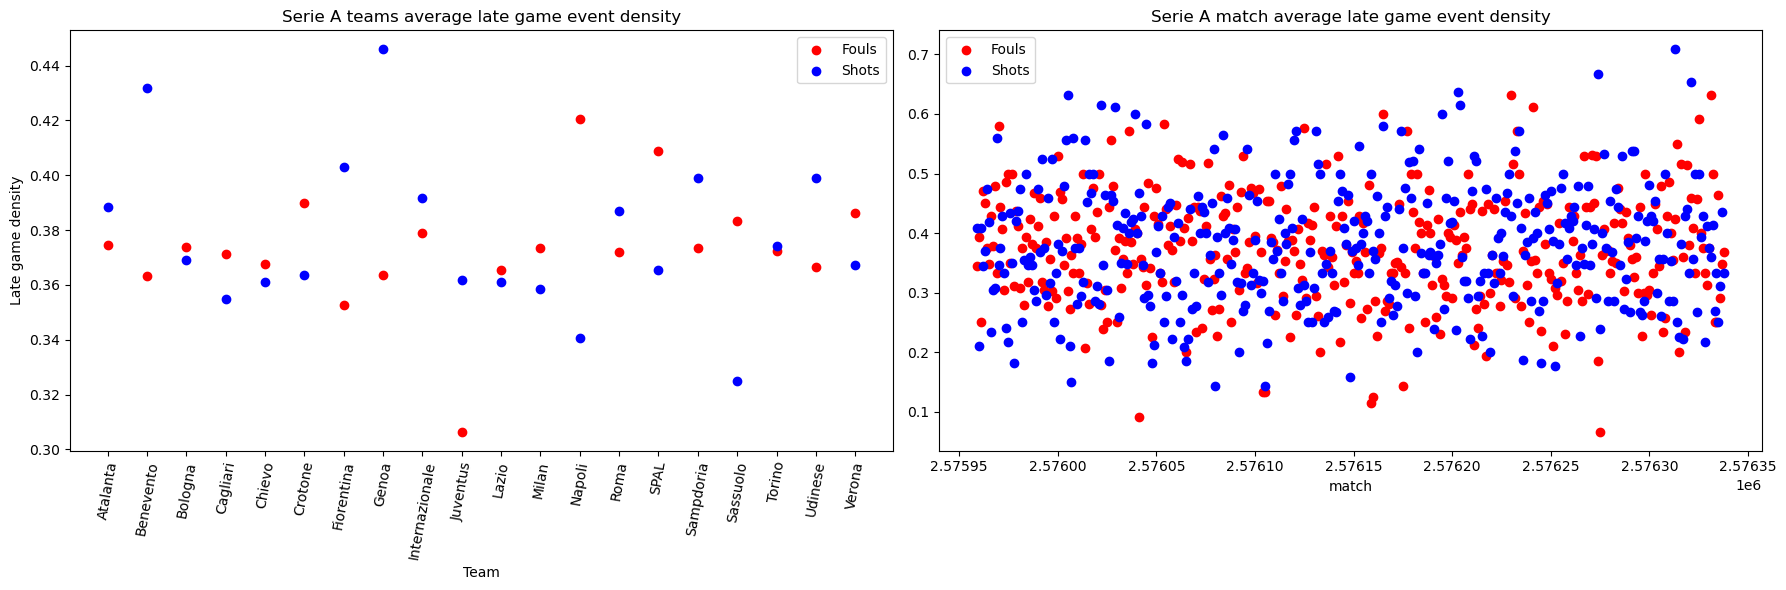

In [346]:
import numpy as np

f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=100)

def plt_by_team(tbl, metric, color):
    team_events = tbl.groupby("team").apply(lambda x: compute_lg_density(x["eventMin"]), include_groups=False)
    
    teams = team_events.keys()
    events = team_events.values

    scatter = axes[0].scatter(
        x=teams, 
        y=events,
        c=color,
        label=metric)  # Add a label here
    
    return scatter

def plt_by_match(tbl, metric, color): 

    scatter = axes[1].scatter(
        x=tbl["matchId"],
        y=tbl[f'late game {metric} density'],
        c=color
    ) 
    return scatter

def compute_lg_density(col): 
    total = len(col) 
    lg = len(list(filter(lambda x: x >= 60, col)))
    return lg / total

fouls_by_team = plt_by_team(italy_fouls, "foul", "red")
shots_by_team = plt_by_team(italy_shots, "shot", "blue")

axes[0].set_title("Serie A teams average late game event density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Late game density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80) 
axes[0].legend([fouls_by_team, shots_by_team], ['Fouls', 'Shots'])

fouls_by_match = plt_by_match(italy_fbm, "foul", "red")
shots_by_match = plt_by_match(italy_sbm, "shot", "blue")

axes[1].set_title("Serie A match average late game event density")
axes[1].set_xlabel("match")
axes[1].legend([fouls_by_match, shots_by_match], ['Fouls', 'Shots'])

plt.tight_layout()
plt.show()


In [317]:
italy_fbm.columns[-1]

'late game foul density'